In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# pulling .csv files
train = pd.read_csv("5challenge_training_ssankaran30.csv", index_col = 0)
test = pd.read_csv("5challenge_testing_ssankaran30.csv", index_col = 0)


In [3]:
x = train.iloc[:, 1:].values
y = train['Class'].values  
p = test.iloc[:, 1:].values
type(y)

numpy.ndarray

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2)
len(X_test)
len(x)

200

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


C_range = [0.00001, 0.0001,0.001, 0.01, 0.1,1,10,100]#[1e-2, 1, 1e2]#np.logspace(-2, 10, 13)
gamma_range = [0.00001, 0.0001,0.001, 0.01, 0.1,1,10,100]#[1e-1, 1, 1e1]#np.logspace(-9, 3, 13)



param_grid = dict(gamma=gamma_range, C=C_range)
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10]}]
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid,cv=cv)
grid.fit(x, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10, 'gamma': 1} with a score of 0.81


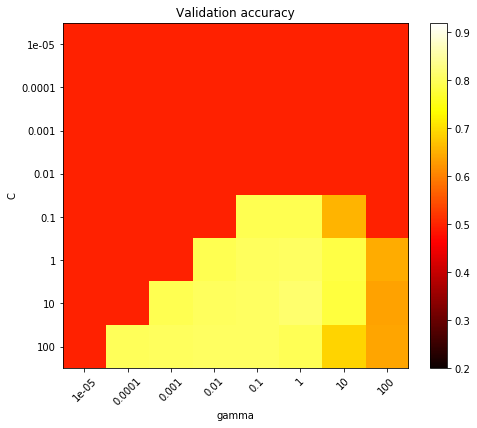

In [32]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=Normalize(vmin=0.2, vmax=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

C:\Users\Samyuktha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


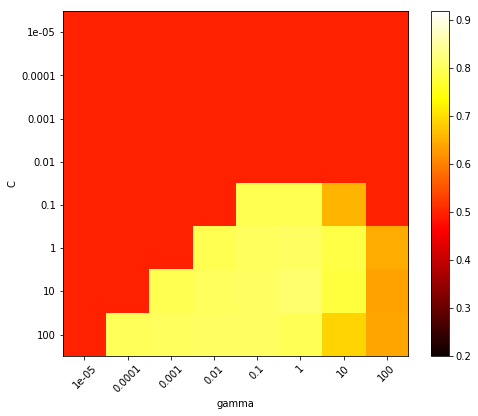

In [33]:
import pylab as pl

# grid_scores_ contains parameter settings and scores
score_dict = grid.grid_scores_

# We extract just the scores
scores = [x[1] for x in score_dict]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))
# Make a nice figure
pl.figure(figsize=(8, 6))
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=Normalize(vmin=0.2, vmax=0.92))
pl.xlabel('gamma')
pl.ylabel('C')
pl.colorbar()
pl.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
pl.yticks(np.arange(len(C_range)), C_range)
pl.show()

In [47]:
from sklearn.model_selection import GridSearchCV
nfolds = 5
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1]

param_grid = {'C': Cs, 'gamma' : gammas}
model = GridSearchCV(svm.SVC(kernel='poly'), param_grid, cv=nfolds)
model.fit(x, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
kernel = "poly"
#model = svm.SVC(kernel='poly')
#model = svm.SVC(gamma='auto', kernel = kernel,
               #max_iter=-1, decision_function_shape = 'ovo',tol = 0.0001,
               #degree = 3, shrinking = True)

In [49]:
model.fit(x, y)   
model.fit(X_train, Y_train)
prediction = model.predict(p)
y_pred =  model.predict(X_test)

In [50]:
count = 0
n = len(X_test)
for i in range(n):
    if(y_pred[i] == Y_test[i]):
        count += 1;
accuracy = count/n;
accuracy*100

70.0

In [51]:
YPred = grid.predict(X_test)
count1 = 0
n1 = len(X_test)
for i in range(n1):
    if(YPred[i] == Y_test[i]):
        count1 += 1;
accuracy1 = count1/n1;
accuracy1*100

80.0

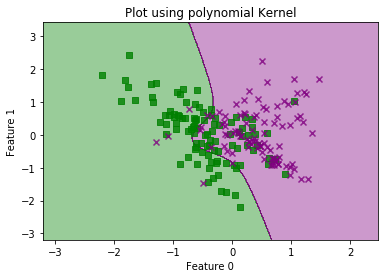

In [52]:
resolution = 0.01
markers = ('s', 'x')#, 'o', '^', 'v')
colors = ('green', 'purple')#, 'lightgreen', 'gray', 'cyan')
    
cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                 np.arange(x2_min, x2_max, resolution))
    
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
    
plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
for idx, cl in enumerate(np.unique(y)):
        
    plt.scatter(x = x[y == cl, 0], y = x[y == cl, 1],
            alpha = 0.8, c = cmap(idx),
            marker = markers[idx])
    plt.title("Plot using polynomial Kernel")
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.savefig("Poly.png")